**EDA-4 Assignment**

The dataset titled "Spotify Data: Popular Hip-hop Artists and Tracks" provides a curated collection of approximately 500 entries showcasing the vibrant realm of hip-hop music. These entries meticulously compile the most celebrated hip-hop tracks and artists, reflecting their significant influence on the genre's landscape. Each entry not only highlights the popularity and musical composition of the tracks but also underscores the creative prowess of the artists and their profound impact on global listeners.


In [2]:
##IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot') # Use stylesheet for plots
#plt.style.use('fivethirtyeight')
#pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', None)

%matplotlib inline

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/spotify (2).csv'  # Replace with your actual file path
spotify_data = pd.read_csv(file_path)

In [4]:
# Display the first few rows of the DataFrame
spotify_data.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [5]:
# Initial inspection
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


**Questions with Solutions**

1.Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.

In [6]:
# Checking for null values
null_values = spotify_data.isnull().sum()

# Checking for duplicate rows
duplicate_rows = spotify_data.duplicated().sum()

# Removing duplicates if any
if duplicate_rows > 0:
    spotify_data = spotify_data.drop_duplicates()

print("Null Values per Column:\n", null_values)
print(f"Number of Duplicate Rows: {duplicate_rows}")


Null Values per Column:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Number of Duplicate Rows: 27


2.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram

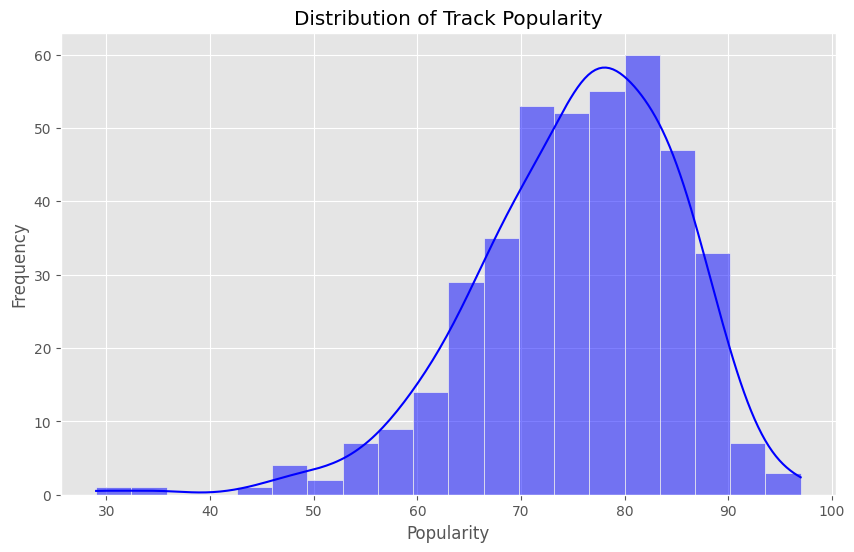

In [7]:
# Plotting the distribution of popularity
plt.figure(figsize=(10, 6))
sns.histplot(spotify_data['Popularity'], bins=20, kde=True, color='blue')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()


3.Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

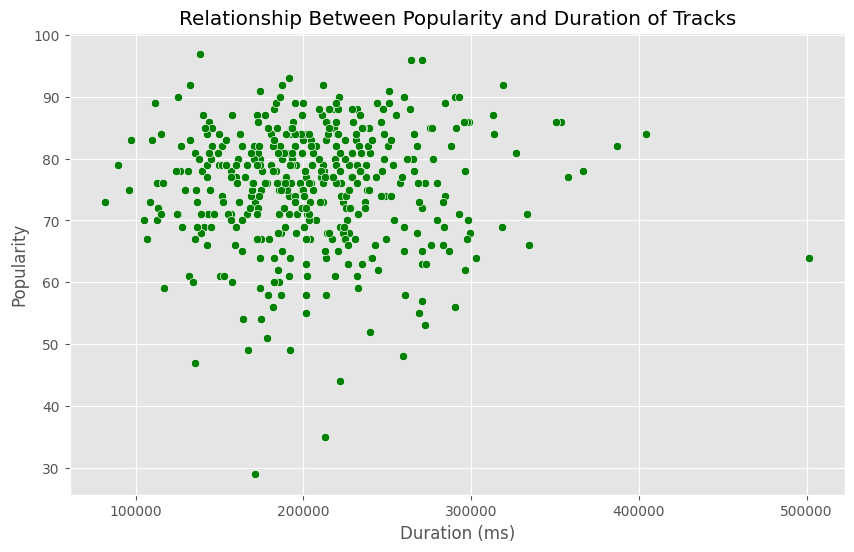

In [8]:
# Scatter plot for popularity vs duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x=spotify_data['Duration (ms)'], y=spotify_data['Popularity'], color='green')
plt.title('Relationship Between Popularity and Duration of Tracks')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()


4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot

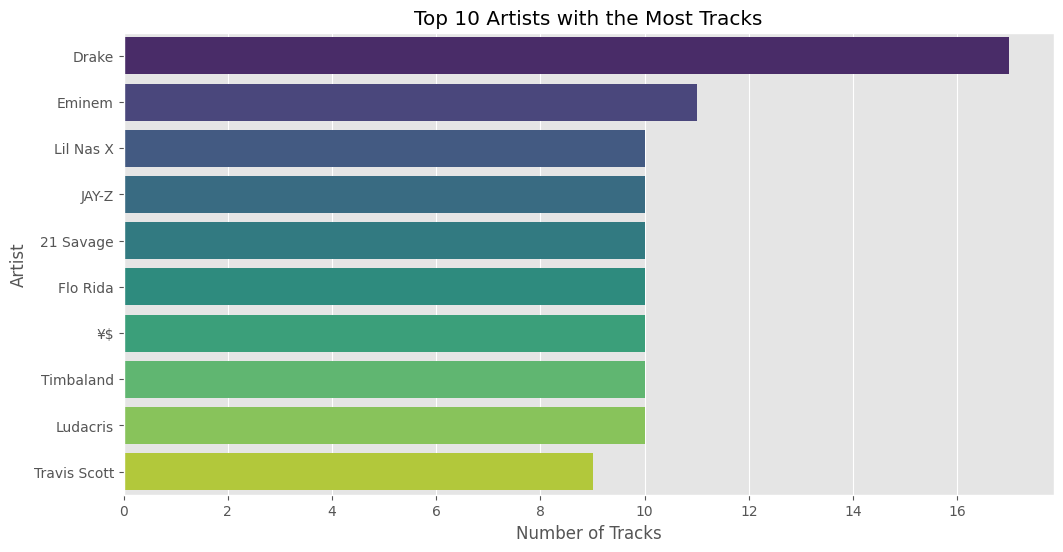

Artist with Most Tracks: Drake (17 tracks)


In [9]:
# Count of tracks per artist
top_artists = spotify_data['Artist'].value_counts()

# Plotting the top 10 artists with the most tracks
plt.figure(figsize=(12, 6))
sns.countplot(y=spotify_data['Artist'],
              order=spotify_data['Artist'].value_counts().head(10).index,
              palette='viridis')
plt.title('Top 10 Artists with the Most Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.show()

# Displaying the artist with the highest number of tracks
most_tracks_artist = top_artists.idxmax()
most_tracks_count = top_artists.max()
print(f"Artist with Most Tracks: {most_tracks_artist} ({most_tracks_count} tracks)")


5.What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

In [10]:
# Finding the 5 least popular tracks
least_popular_tracks = spotify_data.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
print("Top 5 Least Popular Tracks:\n", least_popular_tracks)


Top 5 Least Popular Tracks:
              Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


6.Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.

In [11]:
# Top 5 artists by track count
top_5_artists = spotify_data['Artist'].value_counts().head(5).index

# Calculate average popularity for each of the top 5 artists
average_popularity_top_artists = (
    spotify_data[spotify_data['Artist'].isin(top_5_artists)]
    .groupby('Artist')['Popularity']
    .mean()
    .sort_values(ascending=False)
)

print("Average Popularity for Top 5 Most Popular Artists:\n", average_popularity_top_artists)


Average Popularity for Top 5 Most Popular Artists:
 Artist
21 Savage    83.800000
Eminem       83.636364
Drake        82.882353
JAY-Z        77.900000
Lil Nas X    75.900000
Name: Popularity, dtype: float64


7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.


In [12]:
# Finding the most popular track for each of the top 5 artists
most_popular_tracks_top_artists = (
    spotify_data[spotify_data['Artist'].isin(top_5_artists)]
    .sort_values(by=['Artist', 'Popularity'], ascending=[True, False])
    .groupby('Artist')
    .first()
)[['Track Name', 'Popularity']]

print("Most Popular Tracks for Top 5 Artists:\n", most_popular_tracks_top_artists)


Most Popular Tracks for Top 5 Artists:
                                         Track Name  Popularity
Artist                                                        
21 Savage                                   redrum          96
Drake      Rich Baby Daddy (feat. Sexyy Red & SZA)          92
Eminem                                  Without Me          90
JAY-Z                              Ni**as In Paris          86
Lil Nas X                        THATS WHAT I WANT          81


8.Visualize relationships between multiple numerical variables simultaneously using a pair plot.

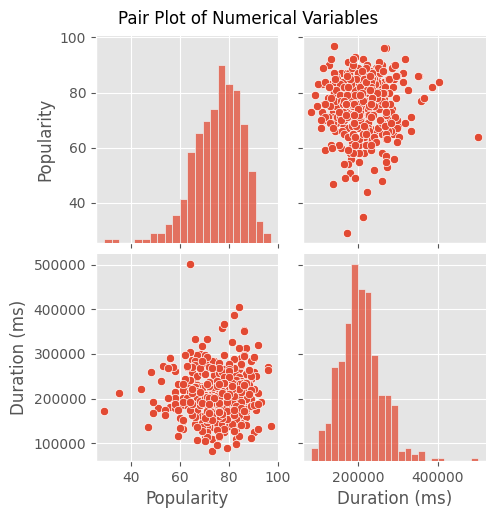

In [13]:
# Pair plot for numerical variables
sns.pairplot(spotify_data[['Popularity', 'Duration (ms)']])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()


9.Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.


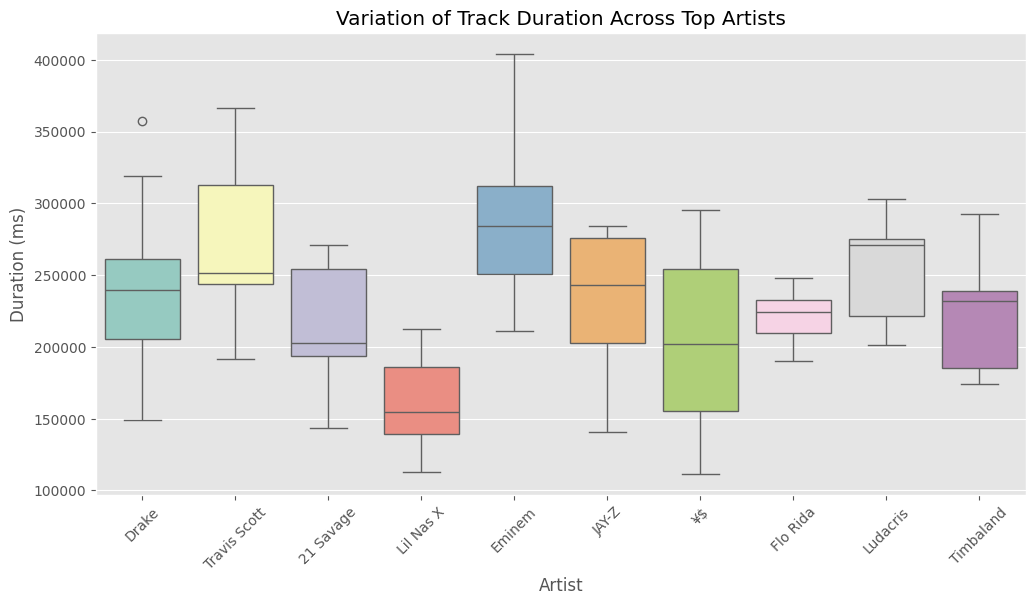

In [14]:
# Box plot for track duration across top 10 artists
top_10_artists = spotify_data['Artist'].value_counts().head(10).index

plt.figure(figsize=(12, 6))
sns.boxplot(x='Artist', y='Duration (ms)',
            data=spotify_data[spotify_data['Artist'].isin(top_10_artists)],
            palette='Set3')
plt.title('Variation of Track Duration Across Top Artists')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.xticks(rotation=45)
plt.show()


10.How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

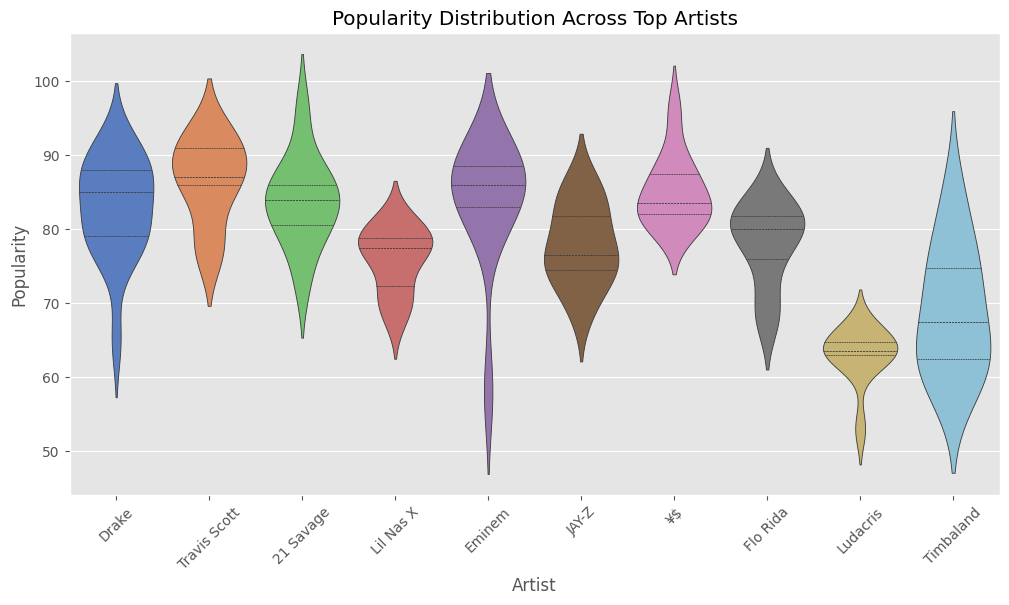

In [15]:
# Swarm plot for popularity distribution across top 10 artists
plt.figure(figsize=(12, 6))
sns.violinplot(x='Artist', y='Popularity',
               data=spotify_data[spotify_data['Artist'].isin(top_10_artists)],
               inner='quartile', palette='muted')
plt.title('Popularity Distribution Across Top Artists')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.show()
